# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [8]:
install.packages("kohonen")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("./milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

ERROR: Error in help(som()): 'topic' should be a name, length-one character vector or reserved word


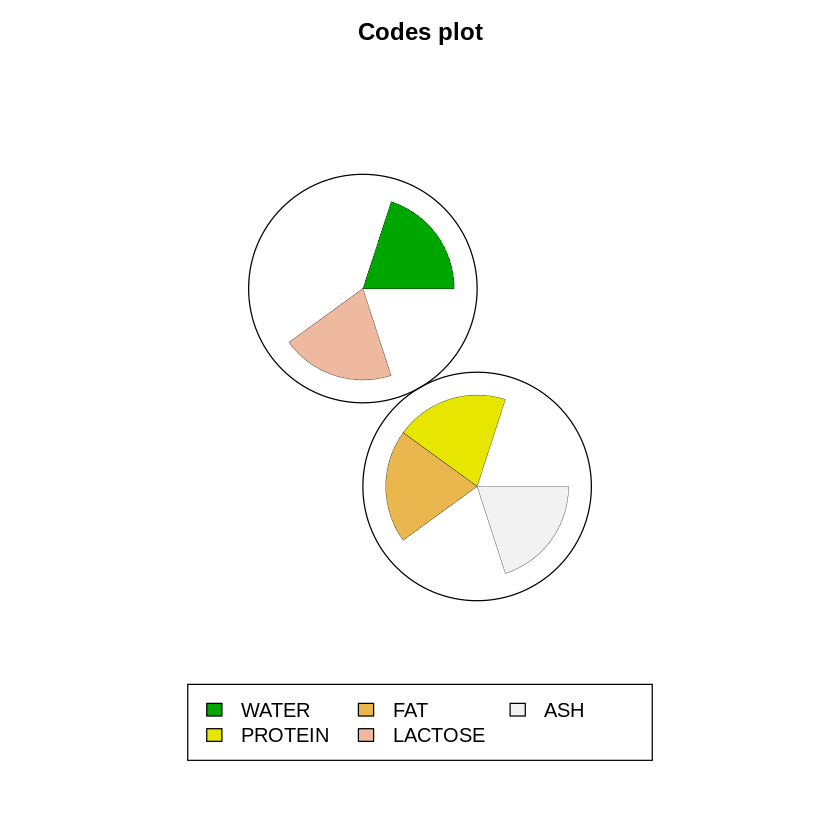

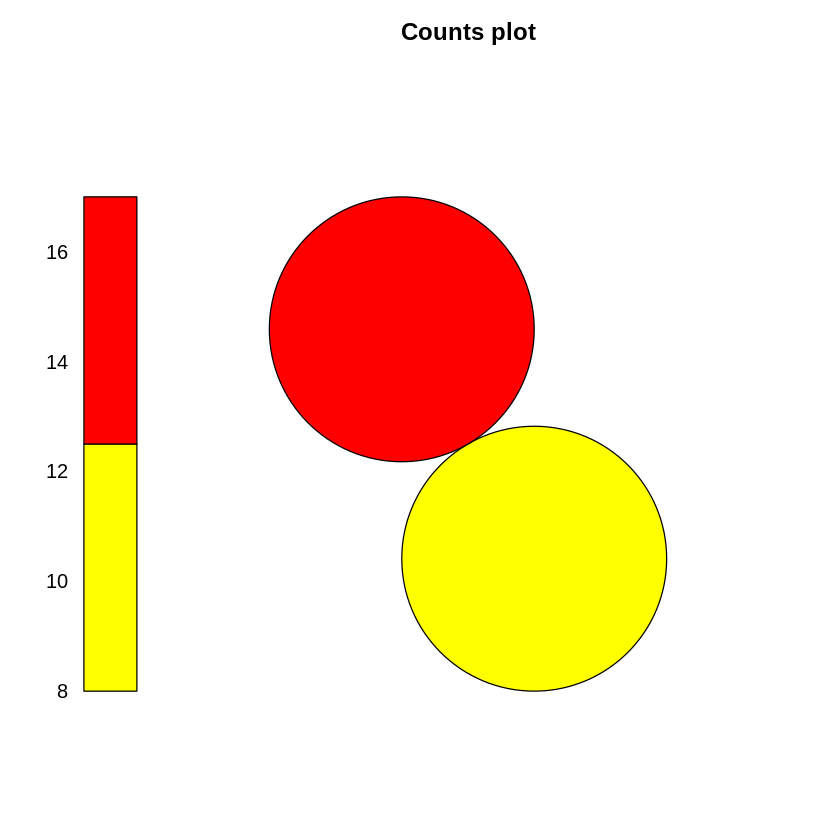

ERROR: Error in cut.default(property, seq(zlim[1], zlim[2], length = ncolors + : 'breaks' are not unique


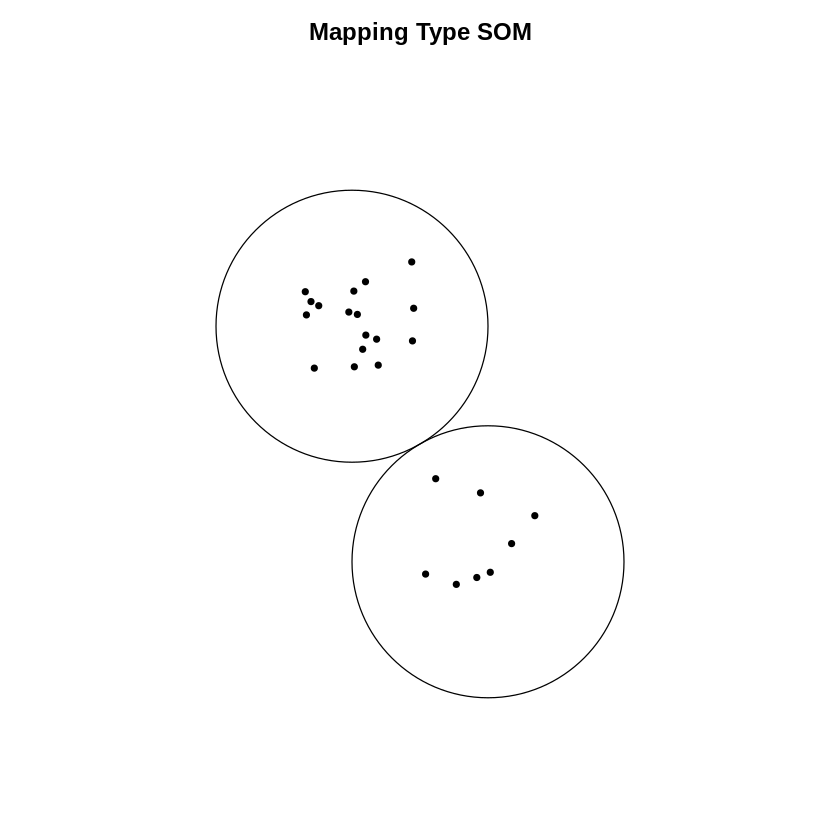

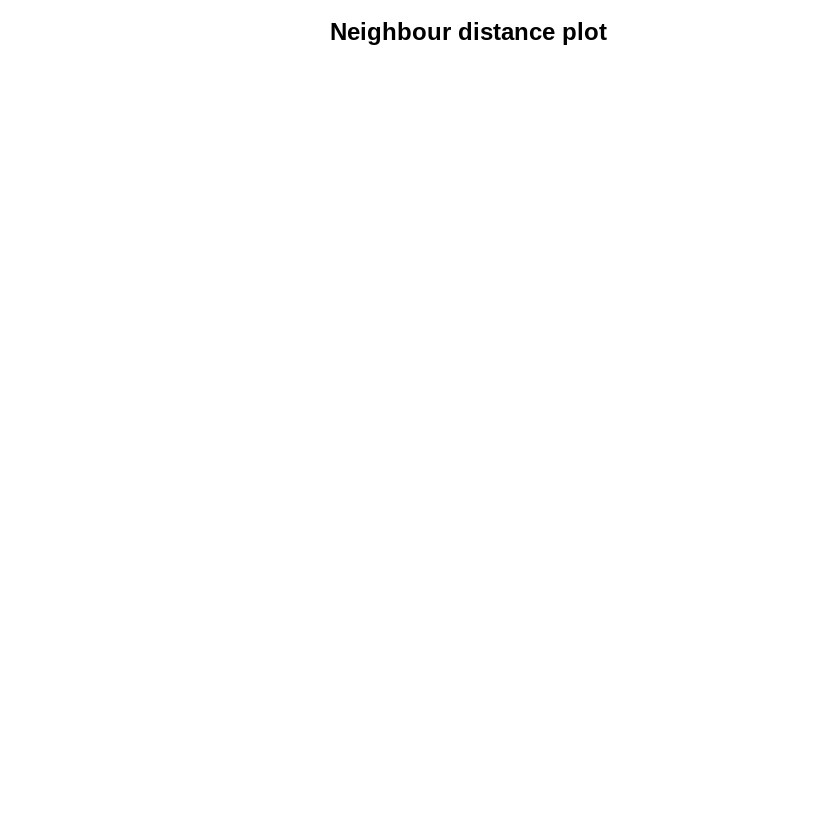

In [11]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(1, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


In [17]:
help(som)

Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

RESPUESTA

el método som implementa las redes de kohen para agrupar datos, recibe en primer lugar los datos y luego la estructura de la malla en la cual se agruparan estos datos  


b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

Es interesante el resultado al variar por ejemplo la malla de 2,2 a 1,2 o 2,1, los grupos que se forman son completamente limpios en cuanto a que parametros considerar para formar los gurpos, uno se basa en agua y lactosa y el otro en las 3 restantes.

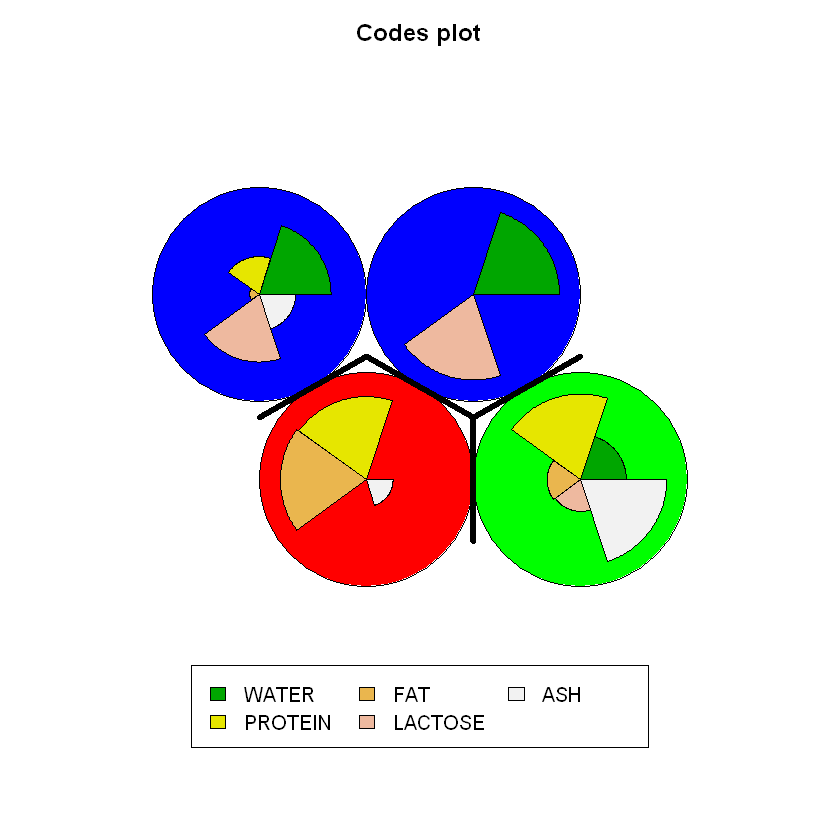

In [3]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización. 

combina en un solo gráfico la información de la clusterización jerarquica y la información obtenida por las redes de kohen, por lo que permite relacionar ambas tecnicas y ver,

b) Interprete y comente los resultados obtenidos. 

mediante la informacion que entregan permite comprender como se podrian fusionar dos grupos según la clusterizacion jerarquica, esta bien loco esto porque siginifica que las redes de kohen tambien van agrupando de manera jerarquica a medida que varia la cantidad de grupos.

Ejercicio 3: 

a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones y discuta sus resultados.

RESPUESTAS:

a) Me gustaria este algoritmo sobre un eventual dataset que contenga mediciones de rasgos fisicos para diferentes personas nativas de diferentes continentes, como por ejemplo mediciones de rasgos faciales y de otras partes del cuerpo, color de pelo, etc. 


b) se podria ver si es posible agrupar de una manera logica a partir de cualidades fisicas de personas de cada uno de los territorios, seria interesante poder ver si se forman grupos logicos de a cuerdo a las divisiones geopoliticas actuales. y que territorios estan mas relacionados entre si al ir disminuyendo la cantidad de grupos.